In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv("/content/dataset.csv", encoding='latin-1')
df.head()

,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Disease,Precautions,Medications,Common Treatment Class
0,Yes,No,Yes,Yes,19,Female,Low,Normal,Influenza,"Vaccination, Avoid huge crowd","Oseltamivir, Zanamivir",Factor replacement therapy
1,No,Yes,Yes,No,25,Female,Normal,Normal,Common Cold,"Rest, fluids.","Diphenhydramine, Phenylephrine",Glucagon
2,No,Yes,Yes,No,25,Female,Normal,Normal,Eczema,"Moisturize, avoid triggers.","Hydrocortisone, Tacrolimus","Chemotherapy, radiation"
3,Yes,Yes,No,Yes,25,Male,Normal,Normal,Asthma,"Avoid triggers, use inhaler.","Albuterol, Fluticasone",Anti-TB medications
4,Yes,Yes,No,Yes,25,Male,Normal,Normal,Asthma,"Avoid triggers, use inhaler.","Albuterol, Fluticasone",Anti-TB medications


In [2]:
y = df[['Disease']]
X = df.drop(columns=['Disease', 'Precautions', 'Medications', 'Common Treatment Class'])

In [3]:
X = pd.get_dummies(X)

In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [5]:
# Create and train the DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [6]:
pred_y=clf.predict(X_test)

In [7]:
from sklearn import metrics
print("Confusion Matrix is\n",metrics.confusion_matrix(y_test, pred_y))
print("Accuracy is",metrics.accuracy_score(y_test, pred_y))

Confusion Matrix is
 [[0 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy is 0.14285714285714285


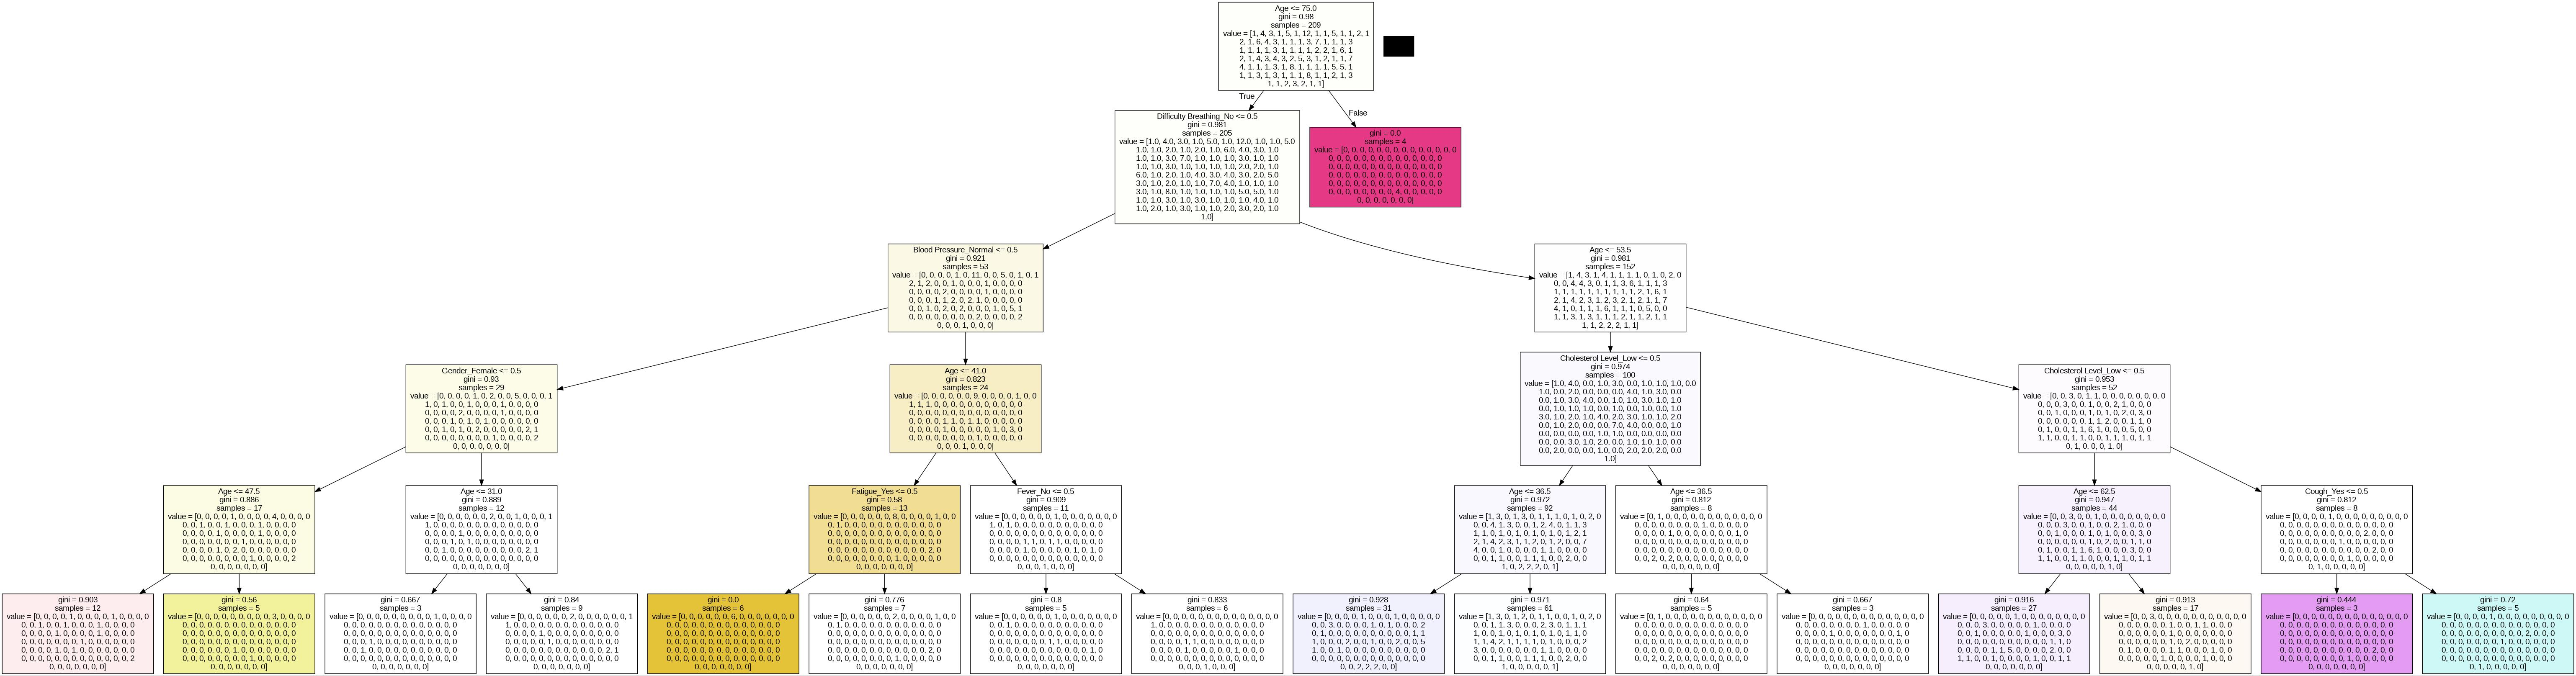

In [8]:
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image
export_graphviz(clf,out_file="tree.odt",feature_names=X_train.columns,filled=True)
graph=pdot.graphviz.graph_from_dot_file("tree.odt")
graph.write_jpg("tree.png")
Image(filename="tree.png")

In [ ]:

# Function to get user input for new data point
def get_new_data_point():
  new_data = {}
  for column in X_train.columns:
    value = input(f"Enter value for {column}: ")
    new_data[column] = value
  return new_data


# Get user input for a new data point
new_data_point = get_new_data_point()

# Create a DataFrame from the new data point
new_data_df = pd.DataFrame([new_data_point])

# Predict the output for the new data point
predicted_disease = clf.predict(new_data_df)

# Print the predicted output
print("Predicted Disease:", predicted_disease[0][0])


Enter value for Age: 25
Enter value for Fever_No: 0
Enter value for Fever_Yes: 1
Enter value for Cough_No: 0
Enter value for Cough_Yes: 1
Enter value for Fatigue_No: 1
Enter value for Fatigue_Yes: 0
Enter value for Difficulty Breathing_No: 1
Enter value for Difficulty Breathing_Yes: 0
Enter value for Gender_Female: 0
Enter value for Gender_Male: 1
Enter value for Blood Pressure_High: 1
Enter value for Blood Pressure_Low: 0
Enter value for Blood Pressure_Normal: 0
Enter value for Cholesterol Level_High: 1
Enter value for Cholesterol Level_Low: 0
Enter value for Cholesterol Level_Normal: 0
Predicted Disease: M
